<a href="https://colab.research.google.com/github/aniruddhha/100-days-of-ml/blob/main/predictive_maintenance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🔥 Machine Predictive Maintenance Classification 🔥**
Dataset to predict machine failure (binary) and type (multiclass)

# **🎯 Multiclass Calssification of <u>Failure Type</u>**

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **🟢 Loading The Data**
### We will use pandas library to read and manage the data. 
`pd.read_csv` is a function provided by the pandas library in Python for reading data from a CSV (Comma-Separated Values) file and creating a DataFrame object. Also it reads the CSV file and returns a DataFrame object that represents the data in a tabular format. The DataFrame allows you to perform various data manipulation and analysis operations easily using pandas' powerful functionalities.

In [109]:
df = pd.read_csv("./sample_data/predictive_maintenance.csv")

# **🟢 Basic Data Analysis**
### In this step we will try to understand data from data frame.

# **👉 df.head()**
The `head(n)` function in pandas is used to retrieve the first n rows of a DataFrame. It helps provide a quick preview of the data and is often used to check the structure and contents of a DataFrame. If n is not provided, it will display the first 5 rows of the DataFrame.

In [110]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


# **👉 df.shape**
The `shape` attribute in pandas DataFrame returns a tuple that represents the dimensions or the size of the DataFrame. The shape of a DataFrame is defined by the number of rows and columns it contains.

In [111]:
df.shape

(10000, 10)

# **👉 df.describe()**
The `describe()` function in pandas DataFrame provides descriptive statistics for the numerical columns of the DataFrame. It calculates various statistical measures, such as count, mean, standard deviation, minimum, quartiles, and maximum values. 

In [112]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


# **👉 df.info()**
The `info()` function in pandas DataFrame provides a concise summary of the DataFrame, including information about the column names, data types, and the presence of missing values.

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


# **👉 df.isnull().sum()**
The code df.isnull().sum() is used to check the number of missing values (or NaN values) in each column of a DataFrame df. It calculates the sum of missing values for each column and returns the result.

In [114]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

# **🟢 Data Visualization**
We will try to understand the patterns in data visually, so that we can understand relationship properly.

# **👉 Pair Plot**
A pair plot, also known as a scatter plot matrix, is a useful visualization in exploratory data analysis (EDA) that displays pairwise relationships between multiple variables in a dataset. The pair plot is typically created using the seaborn library in Python.

In the below code, `sns.pairplot` is called with the DataFrame df as the input. This function automatically creates a grid of scatter plots, where each variable is plotted against every other variable in the dataset. The diagonal of the grid usually contains kernel density plots or histograms for each variable.

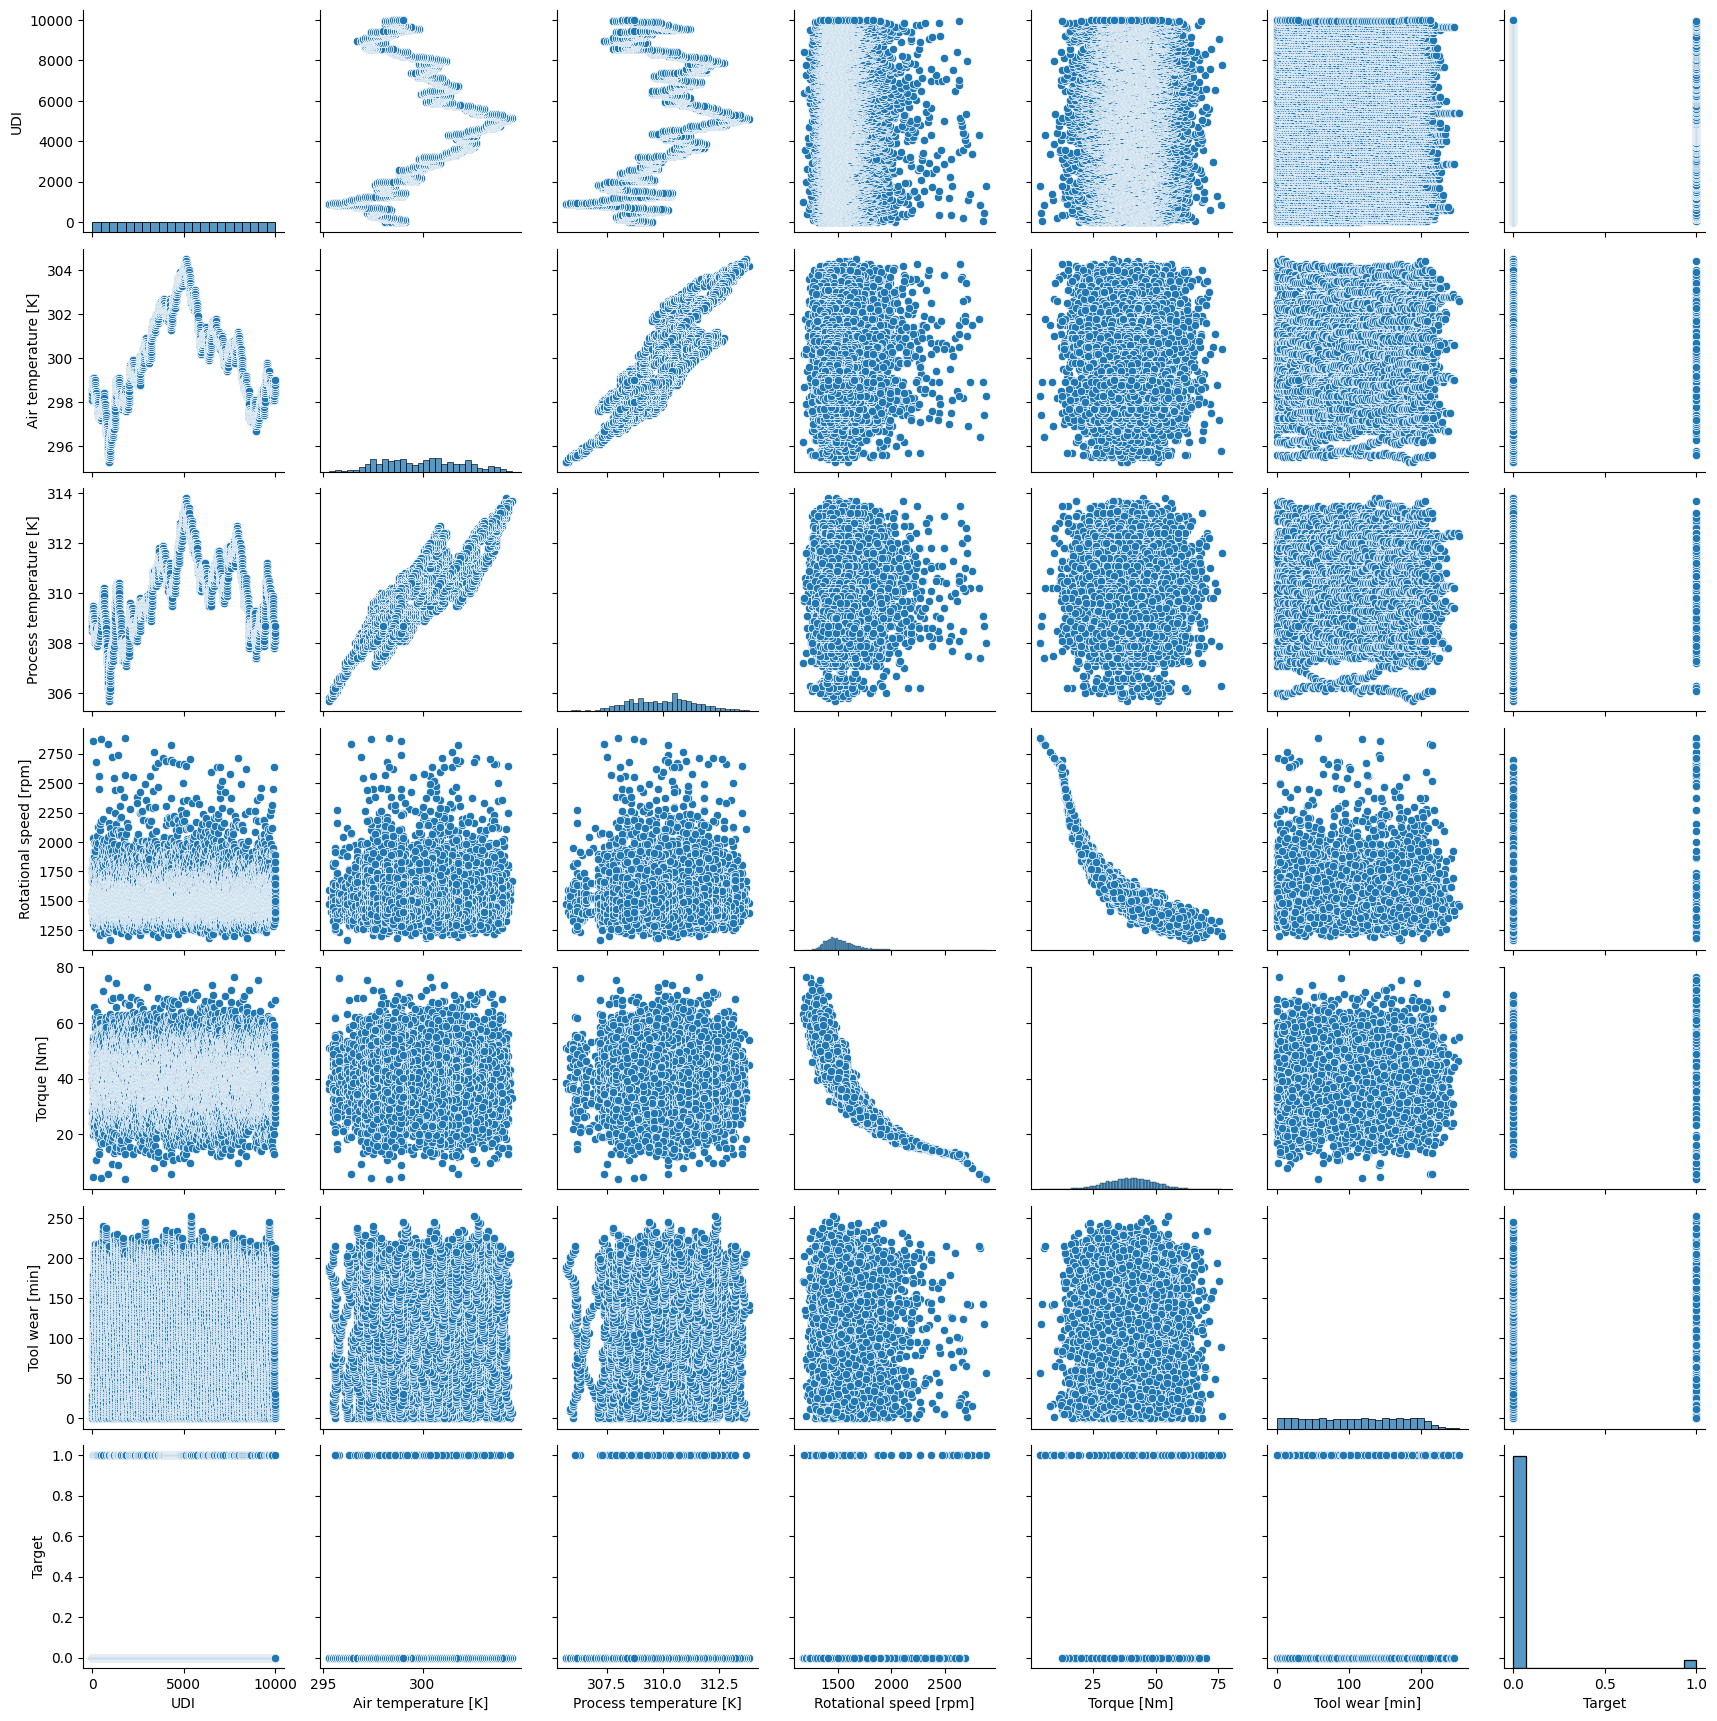

In [115]:
sns.pairplot(df)

# **👉 Histogram**
A histogram is a graphical representation of the distribution of a single variable. It consists of a series of bars, where each bar represents a range or "bin" of values and the height of the bar represents the frequency or count of data points that fall into that bin. The histogram provides insights into the underlying data distribution, such as the central tendency, spread, and shape of the variable. It helps to visualize the concentration or dispersion of values and identify any patterns or outliers in the data. Histograms are commonly used in exploratory data analysis to gain a better understanding of the data and make informed decisions during data analysis and modeling.

`sns.histplot(data=df, x='Air temperature [K]', kde=True, ax=ax[0,0])`

# **👉 Boxplot**
A box plot, also known as a box-and-whisker plot, is a graphical representation of the distribution of a dataset. It provides a concise summary of the key statistical measures, such as the minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum.

In a box plot, a rectangle or "box" is drawn from the first quartile (Q1) to the third quartile (Q3), with a horizontal line inside representing the median (Q2). Whiskers extend from the box to the minimum and maximum values within a certain range, often determined by the interquartile range (IQR). Data points falling outside the whiskers are typically considered outliers.

Box plots help to visualize the spread, skewness, and presence of outliers in a dataset. They provide insights into the distribution's central tendency, variability, and overall shape, making it easier to compare different groups or variables. Box plots are widely used in exploratory data analysis and are particularly useful for identifying potential anomalies or differences between groups.

`sns.boxplot(data=df, x='Air temperature [K]', ax=ax[1,0])`

# **👉 KDE (Kernel Density Estimation)**

KDE stands for Kernel Density Estimation. It is a non-parametric technique used to estimate the probability density function (PDF) of a random variable based on a set of observed data points.

In KDE, a kernel function is placed at each data point, and these kernel functions are summed up to create a smooth estimate of the underlying probability density. The kernel function typically takes the shape of a bell curve or a similar symmetric shape.

KDE is particularly useful when the underlying data distribution is not known or when the data is sparse or irregularly spaced. It allows us to estimate the density of the data at any point in the range of the observed data, providing a continuous representation of the distribution.

KDE plots are commonly used in exploratory data analysis to visualize the distribution of a variable, identify peaks or modes, and compare multiple distributions. They can be created using libraries like seaborn or scikit-learn in Python.

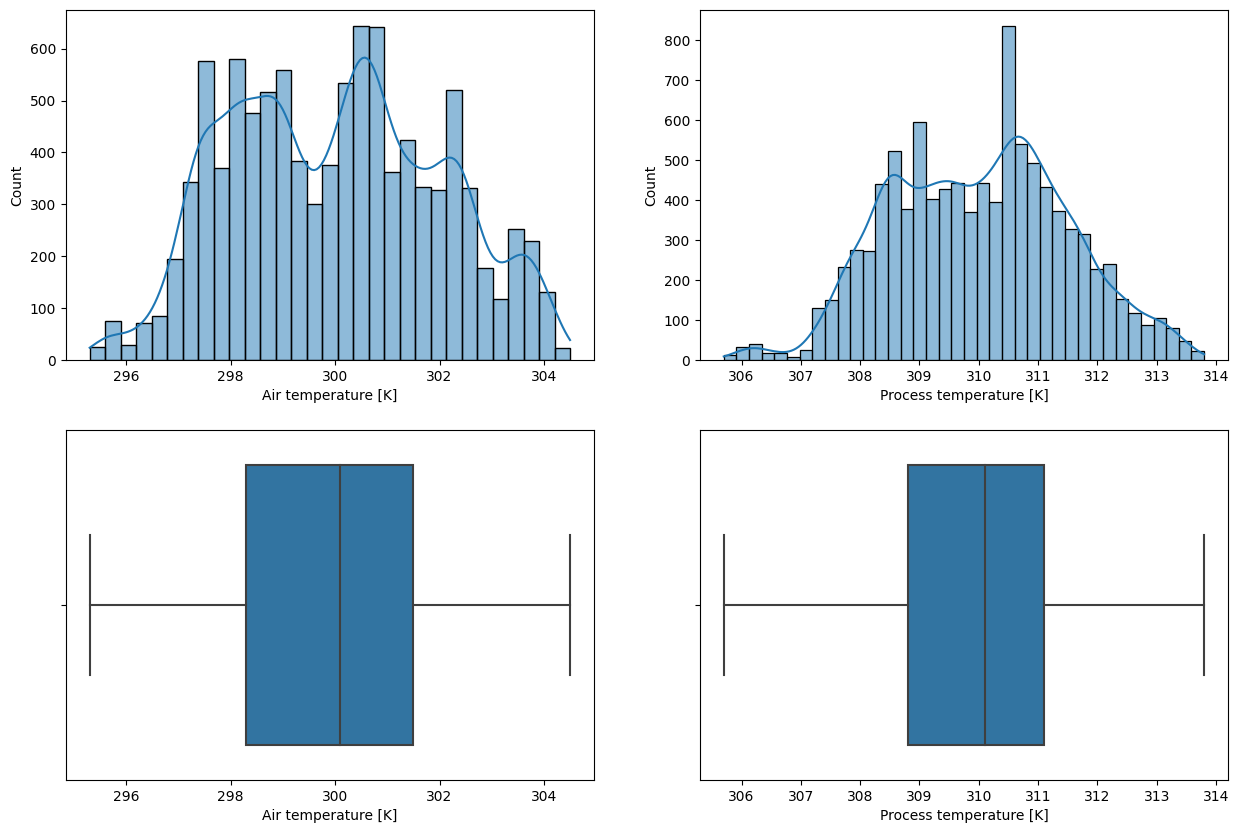

In [116]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
sns.histplot(data=df, x='Air temperature [K]', kde=True, ax=ax[0,0])
sns.histplot(data=df, x='Process temperature [K]', kde=True, ax=ax[0,1])
sns.boxplot(data=df, x='Air temperature [K]', ax=ax[1,0])
sns.boxplot(data=df, x='Process temperature [K]', ax=ax[1,1])
plt.show()

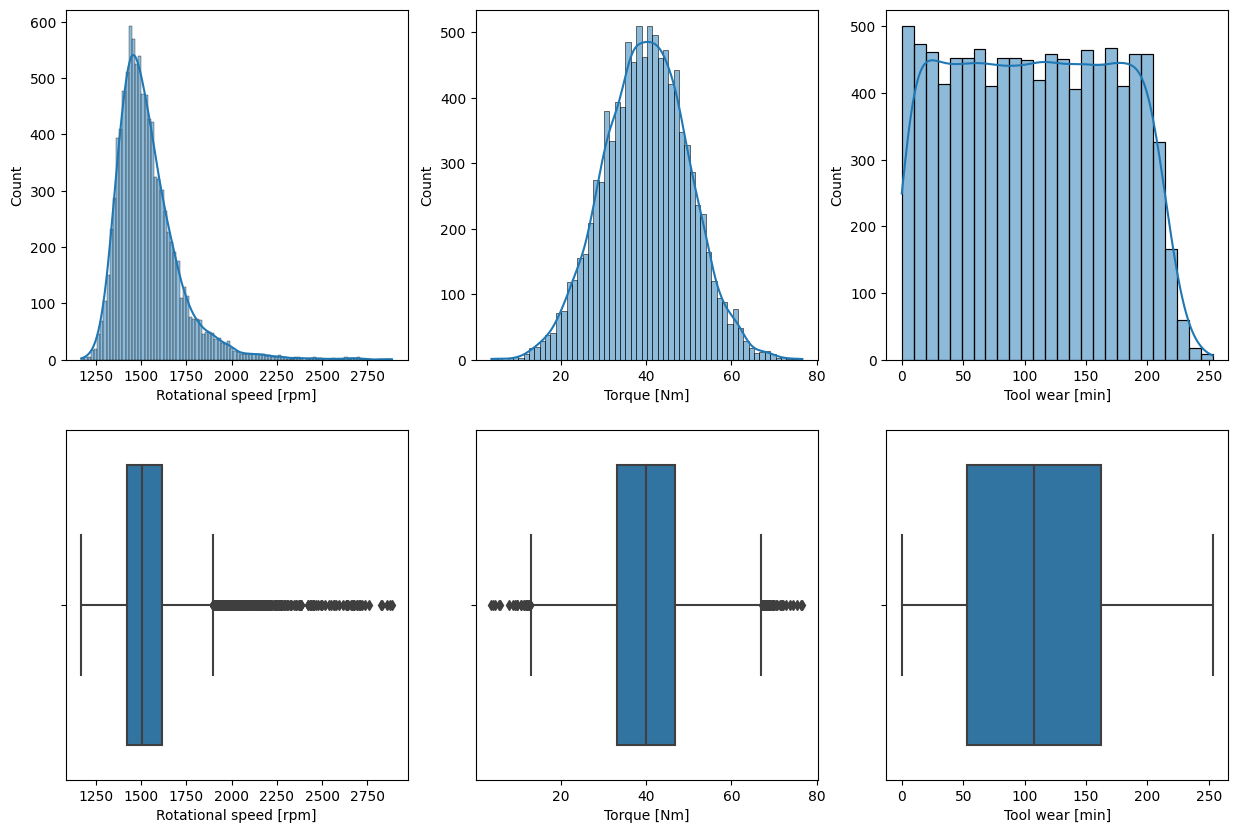

In [117]:
fig1, ax1 = plt.subplots(2, 3, figsize=(15,10))
sns.histplot(data=df, x='Rotational speed [rpm]', kde=True, ax=ax1[0,0])
sns.histplot(data=df, x='Torque [Nm]', kde=True, ax=ax1[0,1])
sns.histplot(data=df, x='Tool wear [min]', kde=True, ax=ax1[0,2])
sns.boxplot(data=df, x='Rotational speed [rpm]', ax=ax1[1,0])
sns.boxplot(data=df, x='Torque [Nm]', ax=ax1[1,1])
sns.boxplot(data=df, x='Tool wear [min]', ax=ax1[1,2])
plt.show()

In [118]:
from collections import OrderedDict
import seaborn as sns

colors = ["#845EC2", "#D65DB1", "#FF6F91", "#FF9671", 
             "#FFC75F", "#008F7A", "#F9F871"]
# background_color = "#FFF6FF"
background_color = "white"

In [119]:
def show_category_distribution(data_frame,label_name,colors,exclude=[],figsize=(10, 5),d=[1, 2],bg_color=background_color):
    
    label_dict = data_frame[label_name].value_counts().to_dict()
    for e in exclude:
        del label_dict[e]
    label_dict = OrderedDict(sorted(label_dict.items(), key=lambda label: label[1]))
    label_classes= label_dict.keys()
    label_values = label_dict.values()
    explode = (0,)*(data_frame[label_name].nunique() - len(exclude))
    
    fig, ax = plt.subplots(d[0], d[1], facecolor=bg_color, figsize=figsize)
    sns.countplot(data=data_frame,
                  x=label_name,
                  palette=colors,
                  edgecolor="black",
                  hatch="\\",
                  ax=ax[0],
                  linewidth=1,
                  order = data_frame[label_name].value_counts().index)
    ax[0].set_title(f"Distribution of \"{label_name}\"", size=14, fontweight="bold")
    ax[0].set_xlabel("Class", size=10, fontweight="bold")
    ax[0].set_ylabel("Frequency", size=10, fontweight="bold")
    ax[0].tick_params(axis="x", labelsize=9) 
    ax[0].tick_params(axis="y", labelsize=9)
    ax[0].bar_label(ax[0].containers[0], fmt="%.0f", color="black", fontsize=9)
    
    plt.pie(label_values,
            explode=explode,
            labels=label_classes,
            autopct="%1.2f%%",
            shadow=True,
            startangle=90,
            textprops={"fontsize": 8, "fontweight": "bold", "color": "black"},
            wedgeprops={"edgecolor": "black"},
            colors=colors,
            labeldistance=1.1)
    plt.title(f"Distribution \n of \"{label_name}\". {','.join(exclude)} {'Excluded' if len(exclude)>0 else ''}",
              fontweight="bold",
              fontsize=14)

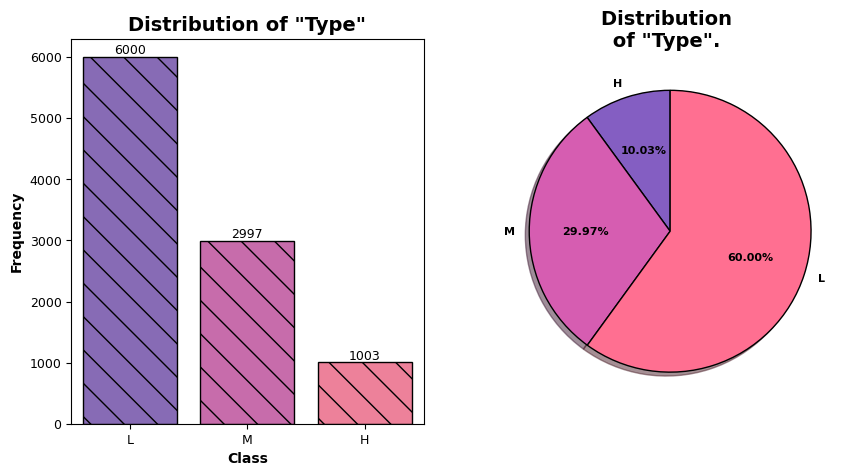

In [120]:
show_category_distribution(df,
                        "Type",
                        colors,
                        bg_color=background_color)

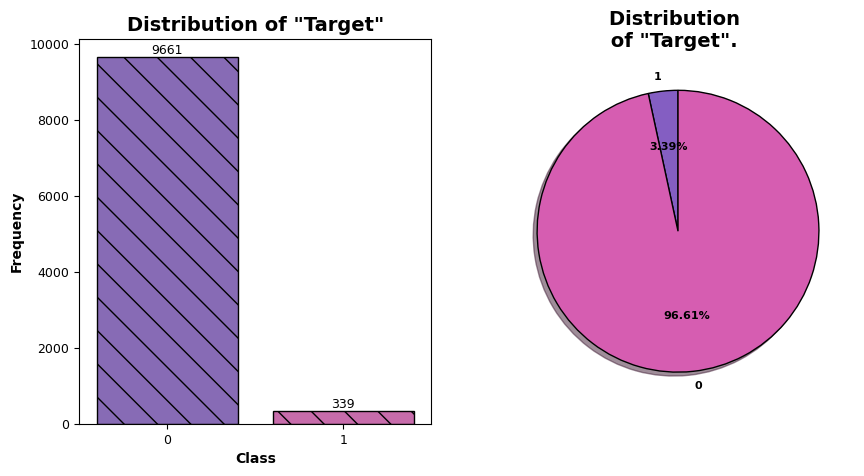

In [121]:
show_category_distribution(df,
                        "Target",
                        colors,
                        bg_color=background_color)

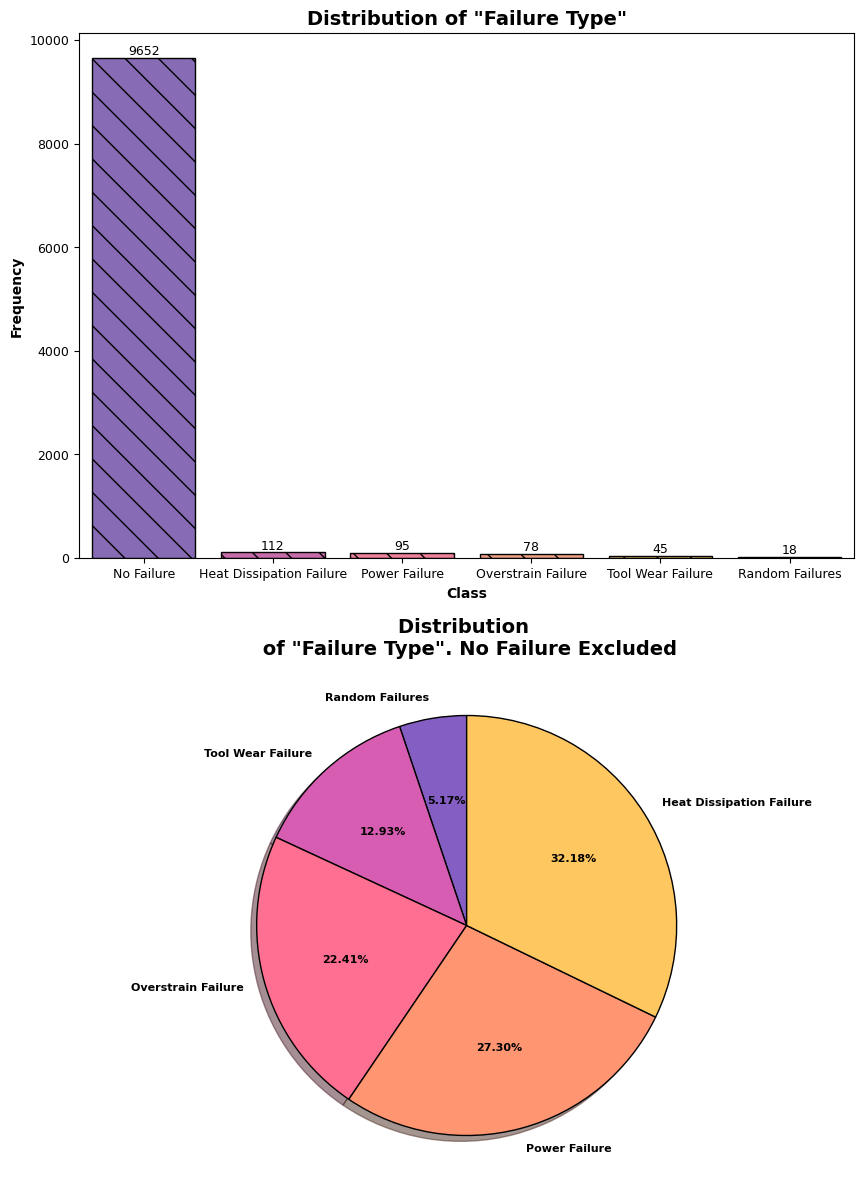

In [122]:
show_category_distribution(df,
                        "Failure Type",
                        colors,
                        exclude=["No Failure"],
                        figsize=(10, 15),
                        d=[2, 1],
                        bg_color=background_color)

# **👉 Outlier**
An outlier is a data point that is significantly different from the majority of the other data points in a dataset. It is an observation that lies far away from the expected or typical pattern exhibited by the rest of the data. Outliers can occur due to errors, extreme values, or rare occurrences. They can have a notable impact on statistical analyses and may require special consideration or treatment.

In [123]:
def show_outliers(data_frame, exclude=[]):
    columns_list = list(data_frame.columns)
    
    if len(exclude) > 0:
        for e in exclude:
            columns_list.remove(e)

    fig = plt.figure(figsize=(10,30), facecolor=background_color)
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    for index, column in enumerate(columns_list):
        ax = fig.add_subplot(12, 3, index +1)
        ax = sns.boxplot(x=df[column],
                         notch=True,
                         flierprops={"marker": "x"},
                         boxprops={"facecolor": (.4, .6, .8, .5)},
                         medianprops={"color": "#C34A36"})

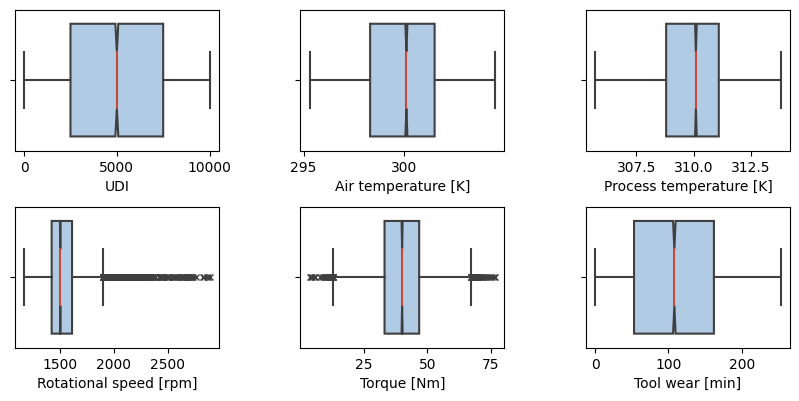

In [124]:
show_outliers(df, exclude=["Failure Type", "Type", "Target", "Product ID"])

# **👉 Correlation Heatmap**

A correlation heatmap is a visual representation of the correlation matrix, which shows the pairwise correlation coefficients between variables in a dataset. It is a matrix of colors where each cell represents the strength and direction of the correlation between two variables.

In a correlation heatmap, each variable in the dataset is represented by both rows and columns. The cells of the heatmap are color-coded based on the correlation coefficient values. Typically, a color gradient is used, where warmer colors (e.g., red or orange) indicate positive correlations, colder colors (e.g., blue or green) indicate negative correlations, and a neutral color (e.g., white or gray) represents no or weak correlation.

Correlation heatmaps are particularly useful in exploratory data analysis to identify relationships and dependencies between variables. They help to visualize the strength and direction of linear relationships, which can provide insights into how variables relate to each other and potentially uncover patterns or dependencies in the data.

`sns.heatmap(corr, annot=True, cmap='coolwarm')`

In [125]:
def show_correlation(data_frame):
    plt.figure(figsize=(10,10), facecolor=background_color)
    corr = data_frame.corr(numeric_only=False)
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title("Correlations", size=22, fontweight="bold")
    plt.tight_layout()


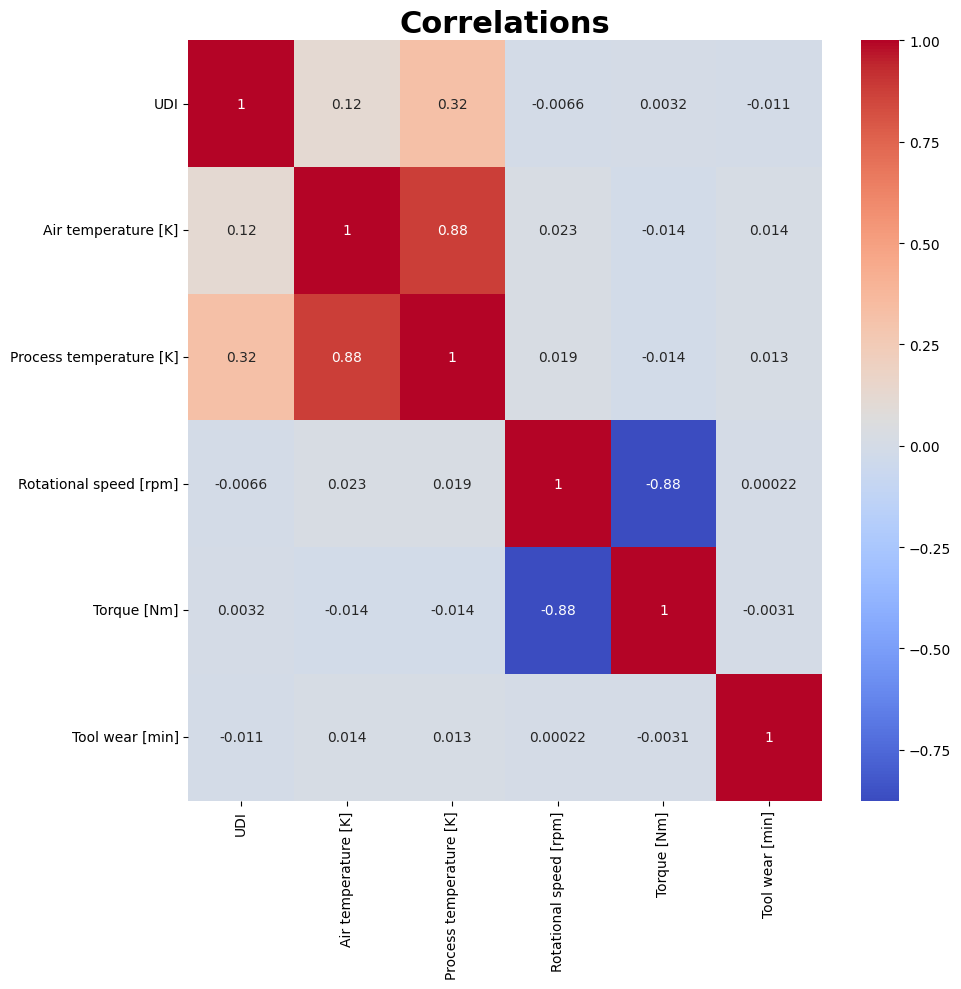

In [126]:
show_correlation(df.drop(["Product ID", "Type", "Target", "Failure Type"], axis=1))

# **🟢 Data Pre-Processing**

In [127]:
from sklearn.model_selection import train_test_split
df_temp=df.copy()

## We need to predict _Failure Type_ from other parameters. We may exclude the UDI and Product Id as these parameters are not that correlated with other parameters.
train_test_split is a function commonly used in machine learning to split a dataset into two separate sets: a training set and a testing set. It is used to evaluate the performance and generalization of a machine learning model.

`train_test_split(X, y, test_size=0.3, random_state=7, stratify=y)`

In [128]:
df_temp=df_temp.drop(["UDI","Product ID"], axis=1)
X = df_temp.drop("Failure Type", axis=1)
y = df_temp["Failure Type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7, stratify=y)

In [129]:
X_train

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
8442,L,298.6,310.0,1517,39.0,4,0
126,L,299.0,308.6,1329,60.5,120,0
7576,M,300.3,311.1,1477,44.2,166,0
2485,L,298.8,308.6,1593,35.5,175,0
7720,H,300.5,311.6,1476,41.7,97,0
...,...,...,...,...,...,...,...
3539,L,302.0,311.0,1686,32.5,25,0
4036,L,302.0,310.8,1445,49.1,2,0
8128,L,300.1,311.4,1629,31.3,41,0
4351,L,301.8,309.6,1432,43.7,138,0


In [130]:
X_train.shape

(7000, 7)

In [131]:
X_test

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
286,L,298.2,308.3,1589,33.2,94,0
570,L,297.7,309.7,1498,41.0,176,0
996,M,296.3,307.2,1286,51.1,177,0
8735,L,297.3,308.6,1358,47.6,110,0
6310,L,300.9,310.1,2090,17.8,133,0
...,...,...,...,...,...,...,...
2613,M,299.3,309.1,1571,38.3,59,0
8694,L,297.2,308.5,1766,25.8,7,0
7161,L,300.2,310.2,1440,42.9,191,0
4393,M,302.2,310.1,1572,34.6,17,0


In [132]:
y_train

8442    No Failure
126     No Failure
7576    No Failure
2485    No Failure
7720    No Failure
           ...    
3539    No Failure
4036    No Failure
8128    No Failure
4351    No Failure
178     No Failure
Name: Failure Type, Length: 7000, dtype: object

In [133]:
y_train.shape

(7000,)

In [134]:
y_test

286     No Failure
570     No Failure
996     No Failure
8735    No Failure
6310    No Failure
           ...    
2613    No Failure
8694    No Failure
7161    No Failure
4393    No Failure
6495    No Failure
Name: Failure Type, Length: 3000, dtype: object

# **👉 One Hot Encoder**
One Hot Encoder is a technique used in machine learning to convert categorical variables into a numerical representation that can be processed by machine learning algorithms. It creates binary features for each category in the original variable, where each binary feature represents the presence or absence of a specific category.

Here's a brief explanation of how One Hot Encoder works:
- Suppose we have a categorical variable with different categories, such as "red," "green," and "blue."

- One Hot Encoder creates a new binary feature for each category. For example, we would have three binary features: "red," "green," and "blue."

- For each data point in the original variable, the corresponding binary feature is set to 1 if the data point belongs to that category and 0 otherwise. For example, if a data point is "red," the "red" feature would be set to 1, and the "green" and "blue" features would be set to 0.

The resulting numerical representation enables machine learning models to handle categorical data effectively. Each category is treated as a separate feature, allowing the model to learn the relationships between the categories and the target variable.

One Hot Encoder is commonly used in scenarios where categorical variables need to be encoded before feeding them into a machine learning model. 




# **👉 Label Encoder**
Label Encoding is a technique used in machine learning to convert categorical variables into numerical representations. It assigns a unique integer value to each category in the variable, transforming the data from categorical to ordinal.

Here's a brief explanation of how Label Encoding works:

- Suppose we have a categorical variable with different categories, such as "red," "green," and "blue."
- Label Encoding assigns a unique integer value to each category. For example, "red" may be encoded as 0, "green" as 1, and "blue" as 2.
- Each data point in the original variable is replaced with its corresponding integer label.

The resulting numerical representation allows machine learning algorithms to process categorical data. However, it's important to note that label encoding introduces an arbitrary ordinal relationship between the categories. This may be problematic if the categories do not have a natural ordering or if the numerical values mislead the model.

Label Encoding is a straightforward technique that is often used when dealing with categorical variables. It is available in libraries like scikit-learn in Python, providing a convenient way to transform categorical data into a suitable format for machine learning algorithms.

# **👉 Column Transformer**

ColumnTransformer is a utility class in scikit-learn (a popular machine learning library in Python) that facilitates applying different preprocessing steps to different columns of a dataset. It allows for efficient and flexible handling of data transformations on specific subsets of features/columns.

Here's a brief explanation of ColumnTransformer:

- <u>Dataset Structure:</u> Consider a dataset with multiple columns, where each column may require different preprocessing steps based on its data type or specific requirements.
- <u>Preprocessing Steps:</u> The ColumnTransformer allows you to define a set of preprocessing steps (transformers) to be applied to specific subsets of columns. These preprocessing steps can include transformations like scaling, one-hot encoding, feature extraction, imputation, or any other preprocessing technique.
- <u>Mapping Columns to Transformers:</u> Using ColumnTransformer, you can specify which columns in the dataset should be processed by each transformer. This mapping is typically defined using tuples containing a name or identifier for the transformer and a list of column names or indices.
- <u>Transformation Execution:</u> When the ColumnTransformer is applied to the dataset, it automatically applies the specified transformations to the corresponding columns. It ensures that each transformation is only applied to the designated columns, preserving the structure of the remaining columns.

ColumnTransformer simplifies the preprocessing workflow by enabling you to define and organize multiple preprocessing steps specific to different subsets of columns in a single operation. It is particularly useful when dealing with datasets that contain a mixture of numeric and categorical features, or when different features require distinct preprocessing approaches.

In [135]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

In [136]:
one_hot_encoder = OneHotEncoder()
transformer = ColumnTransformer([("one_hot_encoder", one_hot_encoder, ["Type", "Target"])],
                                remainder="passthrough")
transformer.fit(X_train)
encoded_X_train = transformer.transform(X_train)
encoded_X_test = transformer.transform(X_test)

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [137]:
encoded_X_train

array([[0.000e+00, 1.000e+00, 0.000e+00, ..., 1.517e+03, 3.900e+01,
        4.000e+00],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 1.329e+03, 6.050e+01,
        1.200e+02],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 1.477e+03, 4.420e+01,
        1.660e+02],
       ...,
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 1.629e+03, 3.130e+01,
        4.100e+01],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 1.432e+03, 4.370e+01,
        1.380e+02],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 1.436e+03, 5.020e+01,
        4.300e+01]])

In [138]:
encoded_X_test

array([[0.000e+00, 1.000e+00, 0.000e+00, ..., 1.589e+03, 3.320e+01,
        9.400e+01],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 1.498e+03, 4.100e+01,
        1.760e+02],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 1.286e+03, 5.110e+01,
        1.770e+02],
       ...,
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 1.440e+03, 4.290e+01,
        1.910e+02],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 1.572e+03, 3.460e+01,
        1.700e+01],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 1.694e+03, 3.110e+01,
        1.870e+02]])

In [139]:
encoded_y_train

array([1, 1, 1, ..., 1, 1, 1])

In [140]:
encoded_y_test

array([1, 1, 1, ..., 1, 1, 1])

# **🟢 Building Neural Network**

Neural networks comprise of layers/modules that perform operations on data. The torch.nn namespace provides all the building blocks you need to build your own neural network. Every module in PyTorch subclasses the nn.Module. A neural network is a module itself that consists of other modules (layers). This nested structure allows for building and managing complex architectures easily.

In [141]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# **👉 Tensors**
Tensors are a specialized data structure that are very similar to arrays and matrices. In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model's parameters.

Tensors are similar to NumPy's ndarrays, except that tensors can run on GPUs or other hardware accelerators. In fact, tensors and NumPy arrays can often share the same underlying memory, eliminating the need to copy data (see Bridge with NumPy). Tensors are also optimized for automatic differentiation (we'll see more about that later in the Autograd section). If you're familiar with ndarrays, you'll be right at home with the Tensor API. If not, follow along!

In [142]:
X_train = torch.FloatTensor(encoded_X_train)
X_test = torch.FloatTensor(encoded_X_test)
y_train = torch.LongTensor(encoded_y_train)
y_test = torch.LongTensor(encoded_y_test)

In [143]:
X_train

tensor([[0.0000e+00, 1.0000e+00, 0.0000e+00,  ..., 1.5170e+03, 3.9000e+01,
         4.0000e+00],
        [0.0000e+00, 1.0000e+00, 0.0000e+00,  ..., 1.3290e+03, 6.0500e+01,
         1.2000e+02],
        [0.0000e+00, 0.0000e+00, 1.0000e+00,  ..., 1.4770e+03, 4.4200e+01,
         1.6600e+02],
        ...,
        [0.0000e+00, 1.0000e+00, 0.0000e+00,  ..., 1.6290e+03, 3.1300e+01,
         4.1000e+01],
        [0.0000e+00, 1.0000e+00, 0.0000e+00,  ..., 1.4320e+03, 4.3700e+01,
         1.3800e+02],
        [0.0000e+00, 1.0000e+00, 0.0000e+00,  ..., 1.4360e+03, 5.0200e+01,
         4.3000e+01]])

In [144]:
X_test

tensor([[0.0000e+00, 1.0000e+00, 0.0000e+00,  ..., 1.5890e+03, 3.3200e+01,
         9.4000e+01],
        [0.0000e+00, 1.0000e+00, 0.0000e+00,  ..., 1.4980e+03, 4.1000e+01,
         1.7600e+02],
        [0.0000e+00, 0.0000e+00, 1.0000e+00,  ..., 1.2860e+03, 5.1100e+01,
         1.7700e+02],
        ...,
        [0.0000e+00, 1.0000e+00, 0.0000e+00,  ..., 1.4400e+03, 4.2900e+01,
         1.9100e+02],
        [0.0000e+00, 0.0000e+00, 1.0000e+00,  ..., 1.5720e+03, 3.4600e+01,
         1.7000e+01],
        [0.0000e+00, 0.0000e+00, 1.0000e+00,  ..., 1.6940e+03, 3.1100e+01,
         1.8700e+02]])

In [145]:
y_train

tensor([1, 1, 1,  ..., 1, 1, 1])

In [146]:
torch.unique(y_train)

tensor([0, 1, 2, 3, 4, 5])

In [147]:
label_encoder.inverse_transform(torch.unique(y_train))

array(['Heat Dissipation Failure', 'No Failure', 'Overstrain Failure',
       'Power Failure', 'Random Failures', 'Tool Wear Failure'],
      dtype=object)

In [148]:
y_test

tensor([1, 1, 1,  ..., 1, 1, 1])

In [149]:
X_train.shape, y_train.shape

(torch.Size([7000, 10]), torch.Size([7000]))

# **👉 Building Model**

We define our neural network by subclassing nn.Module, and initialize the neural network layers in `__init__`. Every nn.Module subclass implements the operations on input data in the forward method.

To use the Model we create an instance of NeuralNetwork. To use the model, we pass it the input data. This executes the model's forward, along with some background operations. Do not call `model.forward()` directly!

# **👉 Layers of Model**

- <u>Sequential:</u> is an ordered container of modules. The data is passed through all the modules in the same order as defined. You can use sequential containers to put together a quick network like seq_modules.

- <u>Linear:</u> The linear layer is a module that applies a linear transformation on the input using its stored weights and biases.

- <u>ReLu:</u> Non-linear activations are what create the complex mappings between the model's inputs and outputs. They are applied after linear transformations to introduce nonlinearity, helping neural networks learn a wide variety of phenomena. 


In [150]:
class PredictiveMaintainanceModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_relu_stack = nn.Sequential(
            nn.Linear(10, 100),
            nn.ReLU(),
            nn.Linear(100, 300),
            nn.ReLU(),
            # nn.Linear(300, 300),
            # nn.ReLU(),
            nn.Linear(300, 100),
            nn.ReLU(),
            # nn.Linear(100, 100),
            # nn.ReLU(),
            nn.Linear(100, 6)
    )
  def forward(self, x):
    logits = self.linear_relu_stack(x)
    return logits

In [151]:
torch.manual_seed(42)
model = torch.compile(PredictiveMaintainanceModel())

# **👉 Model Parameters**

Now that we have a model and data it's time to train, validate and test our model by optimizing its parameters on our data. Training a model is an iterative process; in each iteration the model makes a guess about the output, calculates the error in its guess (loss), collects the derivatives of the error with respect to its parameters, and optimizes these parameters using gradient descent. 

- <u>Optimization Loop:</u> Once we set our hyperparameters, we can then train and optimize our model with an optimization loop. Each iteration of the optimization loop is called an epoch.

  Each epoch consists of two main parts:
  - The Train Loop - iterate over the training dataset and try to converge to optimal parameters.
  - The Validation/Test Loop - iterate over the test dataset to check if model performance is improving.
- <u>Loss Function:</u> When presented with some training data, our untrained network is likely not to give the correct answer. Loss function measures the degree of dissimilarity of obtained result to the target value, and it is the loss function that we want to minimize during training. To calculate the loss we make a prediction using the inputs of our given data sample and compare it against the true data label value.
- <u>Optimizer:</u> Optimization is the process of adjusting model parameters to reduce model error in each training step. Optimization algorithms define how this process is performed (in this example we use Stochastic Gradient Descent). All optimization logic is encapsulated in the optimizer object. Here, we use the SGD optimizer; additionally, there are many different optimizers available in PyTorch such as ADAM and RMSProp, that work better for different kinds of models and data.


In [152]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [153]:
def train(epochs):
  losses = []
  for i in range(epochs):
    i = i + 1
    y_pred = model(X_train)
    loss = loss_function(y_pred, y_train)
    losses.append(loss)
    if((i % 10) == 1):
      print(f'Epoch Number {i} and Loss {loss.item()}')
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

  return losses

In [154]:
epochs = 150
losses = train(epochs)

Epoch Number 1 and Loss 41.82083511352539
Epoch Number 11 and Loss 13.834158897399902
Epoch Number 21 and Loss 5.333707809448242
Epoch Number 31 and Loss 0.35258254408836365
Epoch Number 41 and Loss 0.22524335980415344
Epoch Number 51 and Loss 0.1924198865890503
Epoch Number 61 and Loss 0.1663871705532074
Epoch Number 71 and Loss 0.1672983020544052
Epoch Number 81 and Loss 0.14424967765808105
Epoch Number 91 and Loss 0.13749702274799347
Epoch Number 101 and Loss 0.12889781594276428
Epoch Number 111 and Loss 0.12427837401628494
Epoch Number 121 and Loss 0.12045158445835114
Epoch Number 131 and Loss 0.11986268311738968
Epoch Number 141 and Loss 0.1932986080646515


In [155]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'Epochs')

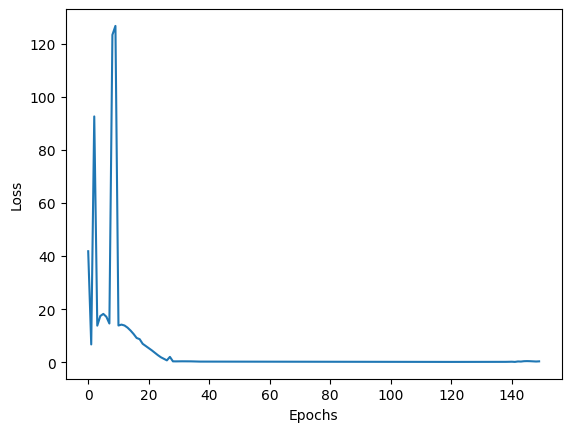

In [156]:
fi_los = [fl.item() for fl in losses ]
plt.plot(range(epochs), fi_los)
plt.ylabel('Loss')
plt.xlabel('Epochs')

In [157]:
def test(): 
  predictions = []

  with torch.no_grad():
    for i, data in enumerate(X_test):
      y_pred = model(data)
      predictions.append(y_pred.argmax().item())

  return predictions

In [158]:
preds = test()

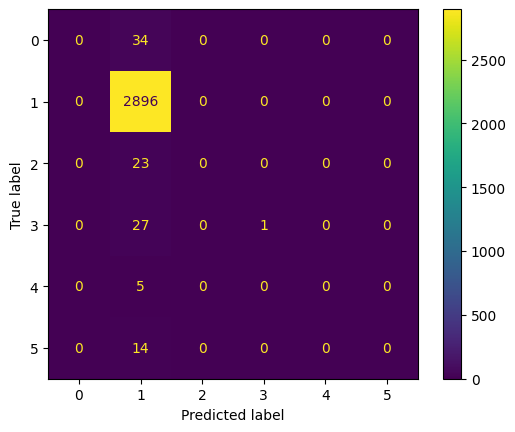

In [159]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, preds)
ConfusionMatrixDisplay(cm).plot()

In [163]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
score = accuracy_score(y_test, preds)
score

0.9656666666666667

In [164]:
def classification_report_heatmap(cr, model_name=""):
    plt.figure(figsize=(12, 5), facecolor=background_color)
    plt.title(f"{model_name} Classification Report Heat Map")
    sns.heatmap(pd.DataFrame(cr).iloc[:-1].T, annot=True, cmap=colors);

In [165]:
def confusion_matrix_display(estimator,
                             predicted_y,
                             true_y=encoded_y_test,
                             X=encoded_X_test,
                             y=encoded_y_test,
                             model_name=""):
    
    fig, ax = plt.subplots(figsize=(6, 6), facecolor=background_color)
    cm = confusion_matrix(predicted_y, true_y)
    cmd = ConfusionMatrixDisplay(cm)
    cmd.from_estimator(estimator, X, y, ax=ax)
    ax.set_title(f"{model_name} Confusion Matrix")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


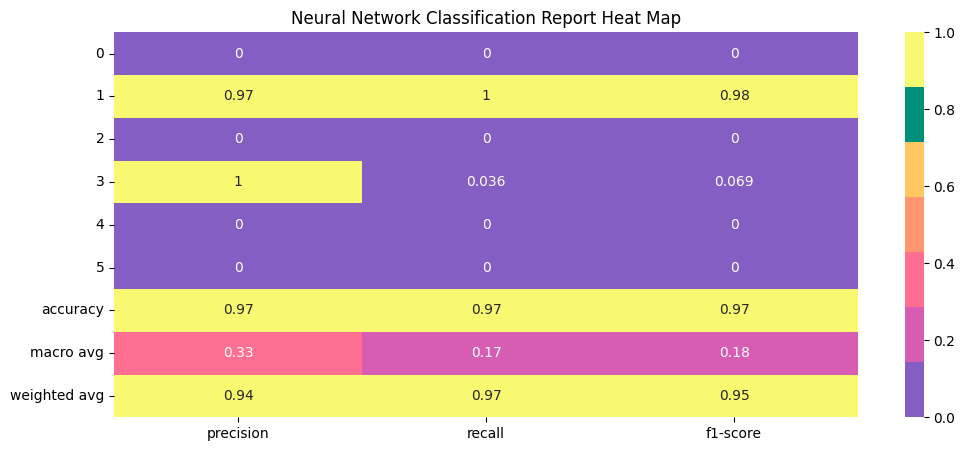

In [167]:
rfc_cr = classification_report(encoded_y_test, preds, output_dict=True)
classification_report_heatmap(rfc_cr, model_name="Neural Network")